# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:

# Load the dataset into a DataFrame
file_path = "C:\\Users\\Waleed\\Desktop\\ml-project-unsupervised-learning\\Wholesale_Data.csv"

wholesale_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(wholesale_data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [16]:
# Check for missing values
missing_values = wholesale_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Display summary statistics
summary_statistics = wholesale_data.describe()
print("\nSummary Statistics:\n", summary_statistics)

Missing Values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Summary Statistics:
           Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.00

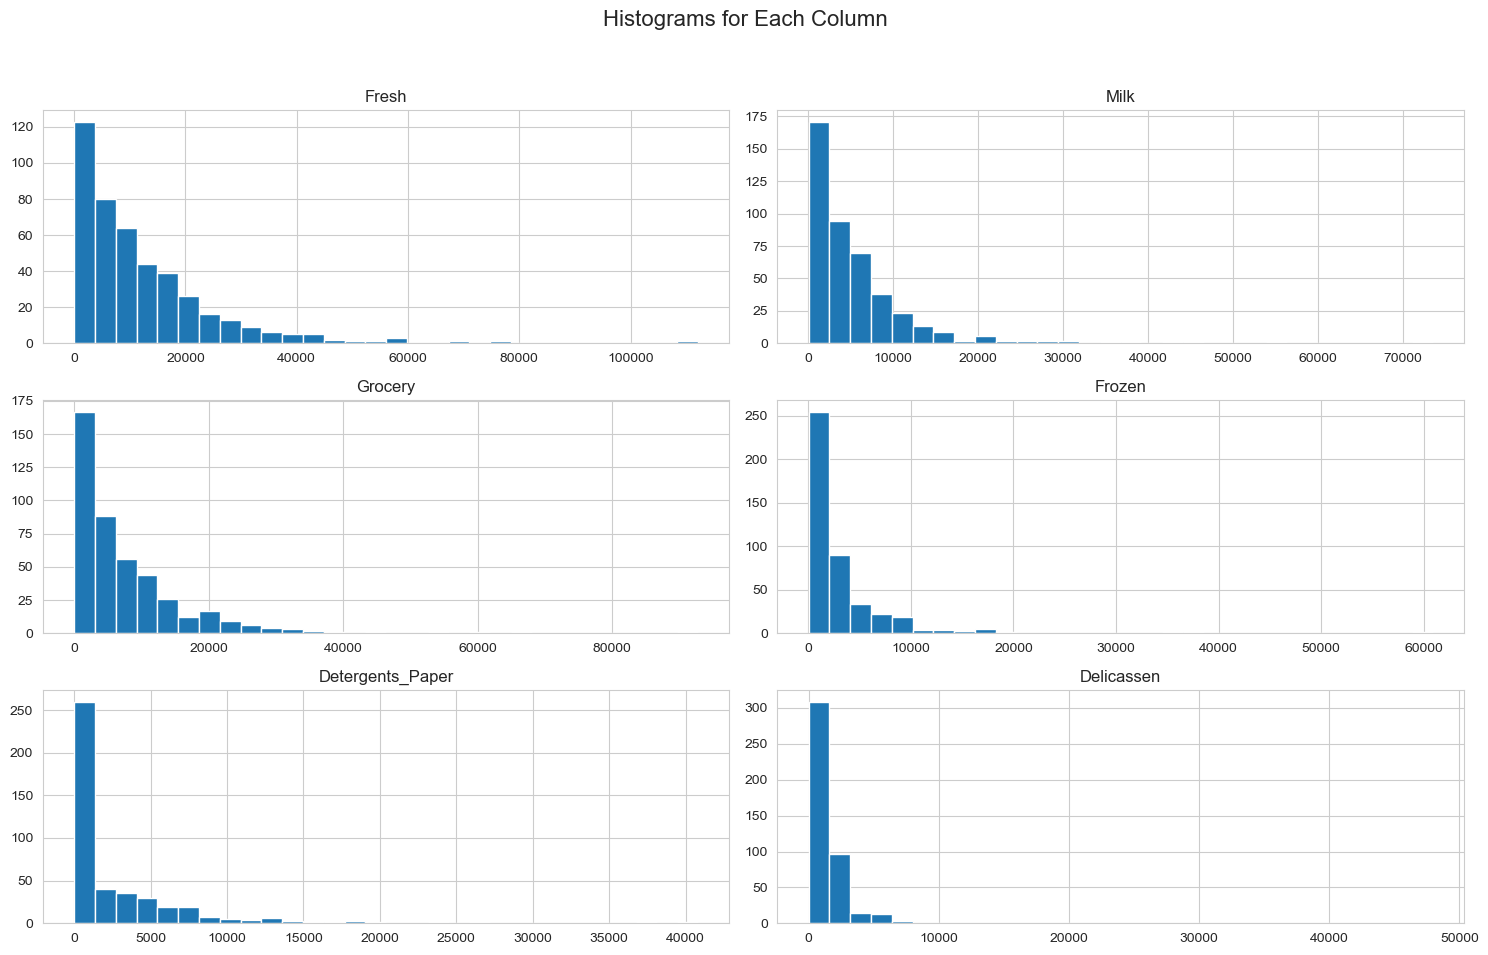

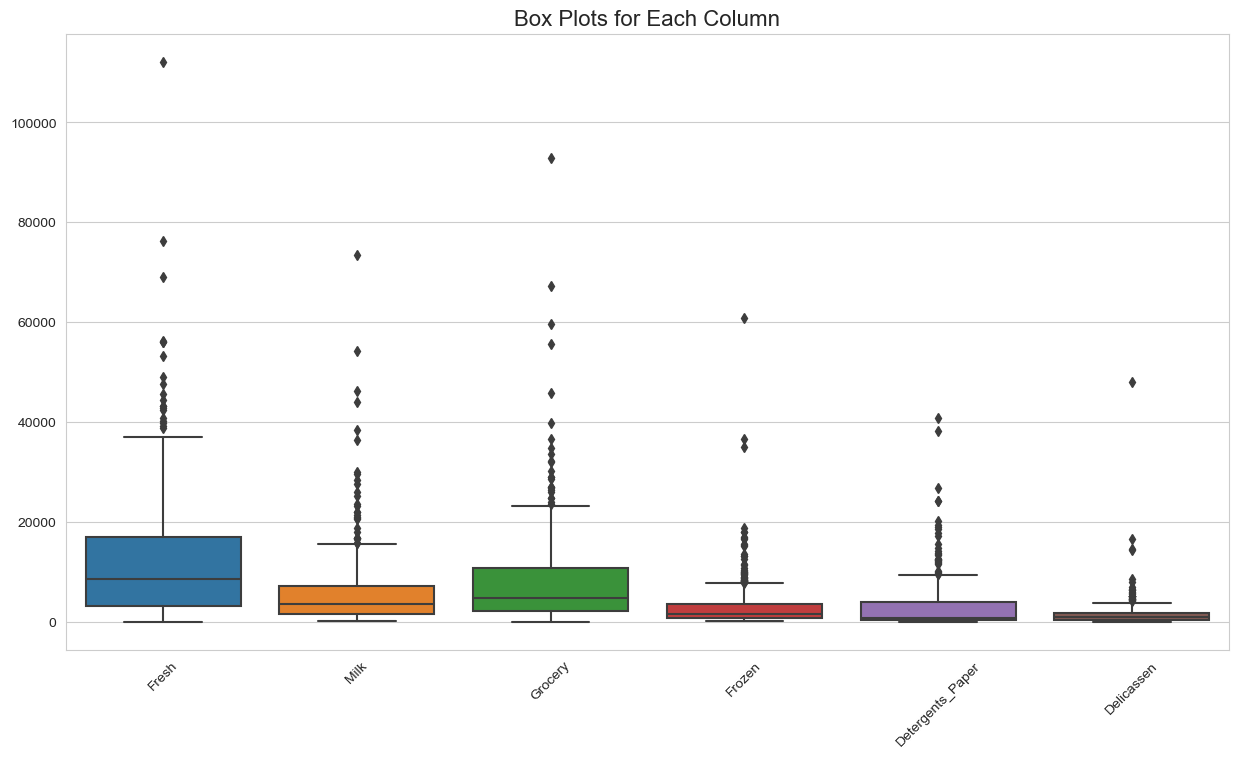

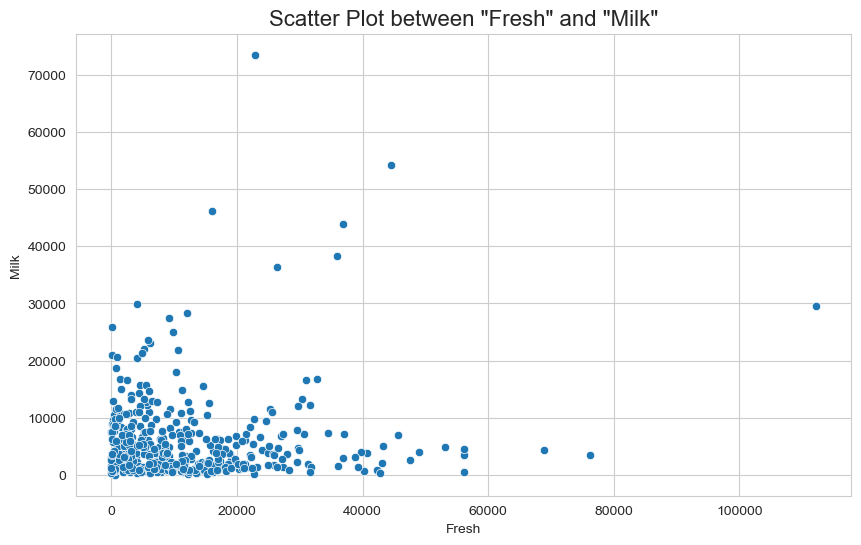

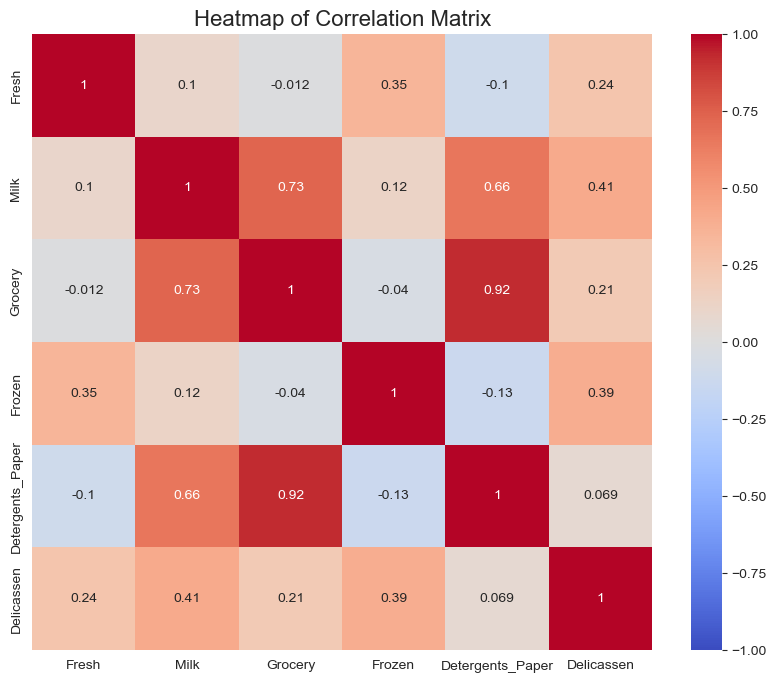

In [17]:
# Set style for seaborn
sns.set_style("whitegrid")

# Histograms
wholesale_data.drop(['Channel', 'Region'], axis=1).hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms for Each Column', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=wholesale_data.drop(['Channel', 'Region'], axis=1))
plt.title('Box Plots for Each Column', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Scatter plot for "Fresh" and "Milk"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wholesale_data, x="Fresh", y="Milk")
plt.title('Scatter Plot between "Fresh" and "Milk"', fontsize=16)
plt.show()

# Heatmap of correlation matrix
correlation_matrix = wholesale_data.drop(['Channel', 'Region'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()

In [18]:
# Compute IQR for each column and identify outliers
outliers = {}
for column in wholesale_data.columns:
    if wholesale_data[column].dtype != 'object':  # Make sure the column is numeric
        Q1 = wholesale_data[column].quantile(0.25)
        Q3 = wholesale_data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and store outliers
        outliers[column] = wholesale_data[(wholesale_data[column] < lower_bound) | (wholesale_data[column] > upper_bound)]

# Display the number of outliers detected for each column
outliers_count = {column: len(values) for column, values in outliers.items() if len(values) > 0}
print(outliers_count)

{'Fresh': 20, 'Milk': 28, 'Grocery': 24, 'Frozen': 43, 'Detergents_Paper': 30, 'Delicassen': 27}


In [19]:
# Calculate the correlation matrix
correlation_matrix = wholesale_data.drop(['Channel', 'Region'], axis=1).corr()

# Extract and print the correlation value for "Grocery" and "Detergents_Paper"
grocery_detergents_corr = correlation_matrix.loc["Grocery", "Detergents_Paper"]
print(correlation_matrix)



                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          1.000000  


In [20]:
# Extracting the numerical columns for standardization
numerical_data = wholesale_data.drop(['Channel', 'Region'], axis=1)

# Initialize the standard scaler
scaler = StandardScaler()

# Transform the data
standardized_data = scaler.fit_transform(numerical_data)

# Convert the standardized data back to a DataFrame for easier inspection
standardized_df = pd.DataFrame(standardized_data, columns=numerical_data.columns)
print(standardized_df.head())

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


In [23]:
# Standardize the data
numerical_data = wholesale_data.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca.fit(standardized_data)

# Extract results
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
pca_components = pca.components_

print(explained_variance_ratio)
print(cumulative_explained_variance)
print(pca_components)

[0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]
[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]
[[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [-0.04868278  0.82657929 -0.31499943 -0.02793224 -0.33964012 -0.31470051]
 [-0.03602539 -0.03804019  0.72174458 -0.01563715 -0.68589373 -0.07513412]]


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

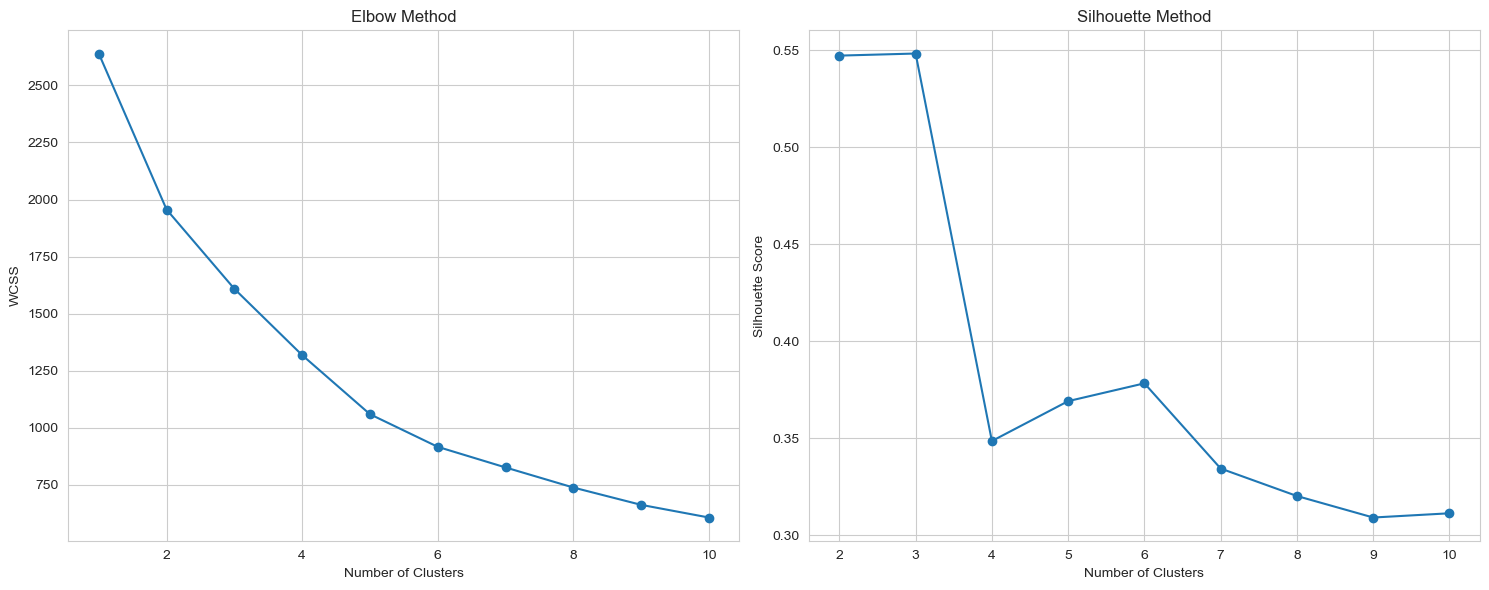

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = r"C:\Users\Waleed\Desktop\ml-project-unsupervised-learning\Wholesale_Data.csv"
wholesale_data = pd.read_csv(file_path)

# Standardize the data
numerical_data = wholesale_data.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Determine the optimal number of clusters
wcss = []
silhouette_scores = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(standardized_data)
    wcss.append(kmeans.inertia_)
    if i > 1:
        silhouette_scores.append(silhouette_score(standardized_data, kmeans.labels_))

# Plotting the results
plt.figure(figsize=(15, 6))

# Elbow method
plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), wcss, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Silhouette method
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = r"C:\Users\Waleed\Desktop\ml-project-unsupervised-learning\Wholesale_Data.csv"
wholesale_data = pd.read_csv(file_path)

# Standardize the data
numerical_data = wholesale_data.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(standardized_data)

# Adding the cluster assignments to the original data for analysis
wholesale_data['Cluster'] = clusters
print(wholesale_data.head())


c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        0  
1        1776        0  
2        7844        0  
3        1788        0  
4        5185        0  


c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


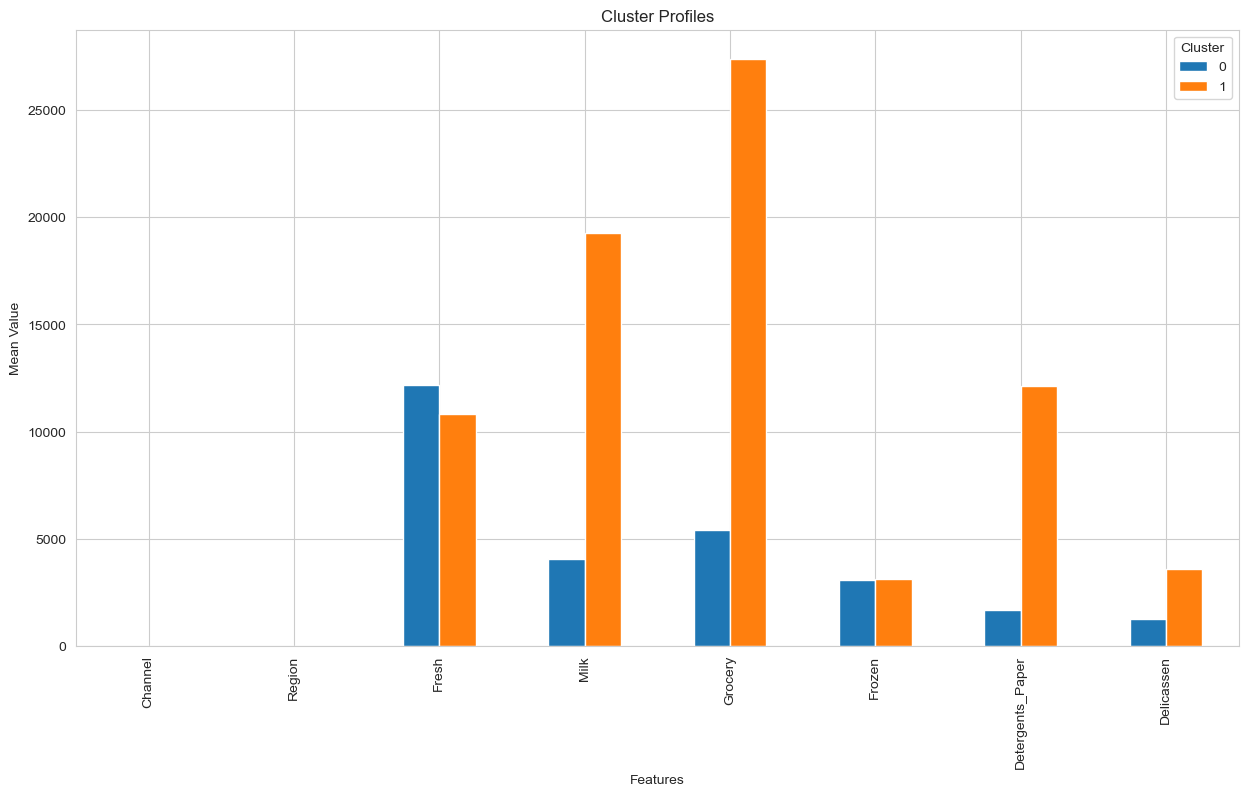

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = r"C:\Users\Waleed\Desktop\ml-project-unsupervised-learning\Wholesale_Data.csv"
wholesale_data = pd.read_csv(file_path)

# Standardize the data
numerical_data = wholesale_data.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(standardized_data)
wholesale_data['Cluster'] = clusters

# Plotting the cluster profiles (mean values of the features for each cluster)
cluster_profiles = wholesale_data.groupby('Cluster').mean()
cluster_profiles_transposed = cluster_profiles.transpose()

plt.figure(figsize=(15, 8))
cluster_profiles_transposed.plot(kind='bar', figsize=(15, 8), ax=plt.gca())
plt.title('Cluster Profiles')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.show()


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.